In [47]:
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import random
import warnings 
warnings.filterwarnings('ignore')
import cv2
import rlcompleter,readline
readline.parse_and_bind('tab:complete')

In [48]:
Normal = os.listdir('C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/NORMAL')
Pneumonia = os.listdir('C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/PNEUMONIA')
# merge = os.listdir('C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/PNEUMONIA')

In [49]:
filename = []
category = []
for label1 in Normal: 
    categories = label1.split('.')[0]
    
    filename.append(categories)
    category.append(2)


In [50]:
categories

'NORMAL2-IM-1423-0001'

In [51]:
Normal_df = pd.DataFrame({ 
    'filename':Normal,
    'category':category
})

In [52]:
Normal_df

,filename,category
0,IM-0115-0001.jpeg,2
1,IM-0117-0001.jpeg,2
2,IM-0119-0001.jpeg,2
3,IM-0122-0001.jpeg,2
4,IM-0125-0001.jpeg,2
...,...,...
1336,NORMAL2-IM-1406-0001.jpeg,2
1337,NORMAL2-IM-1412-0001.jpeg,2
1338,NORMAL2-IM-1419-0001.jpeg,2
1339,NORMAL2-IM-1422-0001.jpeg,2


In [53]:
categories2 = []
filename = []
for label2 in Pneumonia: 
    category2 = label2.split('.')[0]
    filename.append(category2)
    a2 = category2.split('_')
    if a2[1] == 'bacteria': 
        categories2.append(1)
    else: 
        categories2.append(0)


In [54]:
category2

'person9_bacteria_41'

In [55]:
a2

['person9', 'bacteria', '41']

In [56]:
Pneumonia_df = pd.DataFrame({ 

    'filename': Pneumonia,
    'category': categories2})

In [57]:
Pneumonia_df

,filename,category
0,person1000_bacteria_2931.jpeg,1
1,person1000_virus_1681.jpeg,0
2,person1001_bacteria_2932.jpeg,1
3,person1002_bacteria_2933.jpeg,1
4,person1003_bacteria_2934.jpeg,1
...,...,...
3870,person99_virus_183.jpeg,0
3871,person9_bacteria_38.jpeg,1
3872,person9_bacteria_39.jpeg,1
3873,person9_bacteria_40.jpeg,1


In [58]:
Pneumonia_df['category'] = Pneumonia_df['category'].replace({1:'bacteria',0:'virus'})

In [59]:
Pneumonia_df

,filename,category
0,person1000_bacteria_2931.jpeg,bacteria
1,person1000_virus_1681.jpeg,virus
2,person1001_bacteria_2932.jpeg,bacteria
3,person1002_bacteria_2933.jpeg,bacteria
4,person1003_bacteria_2934.jpeg,bacteria
...,...,...
3870,person99_virus_183.jpeg,virus
3871,person9_bacteria_38.jpeg,bacteria
3872,person9_bacteria_39.jpeg,bacteria
3873,person9_bacteria_40.jpeg,bacteria


In [60]:
import cv2
import random 
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator,load_img 

# Normal lung example (Healthy People)

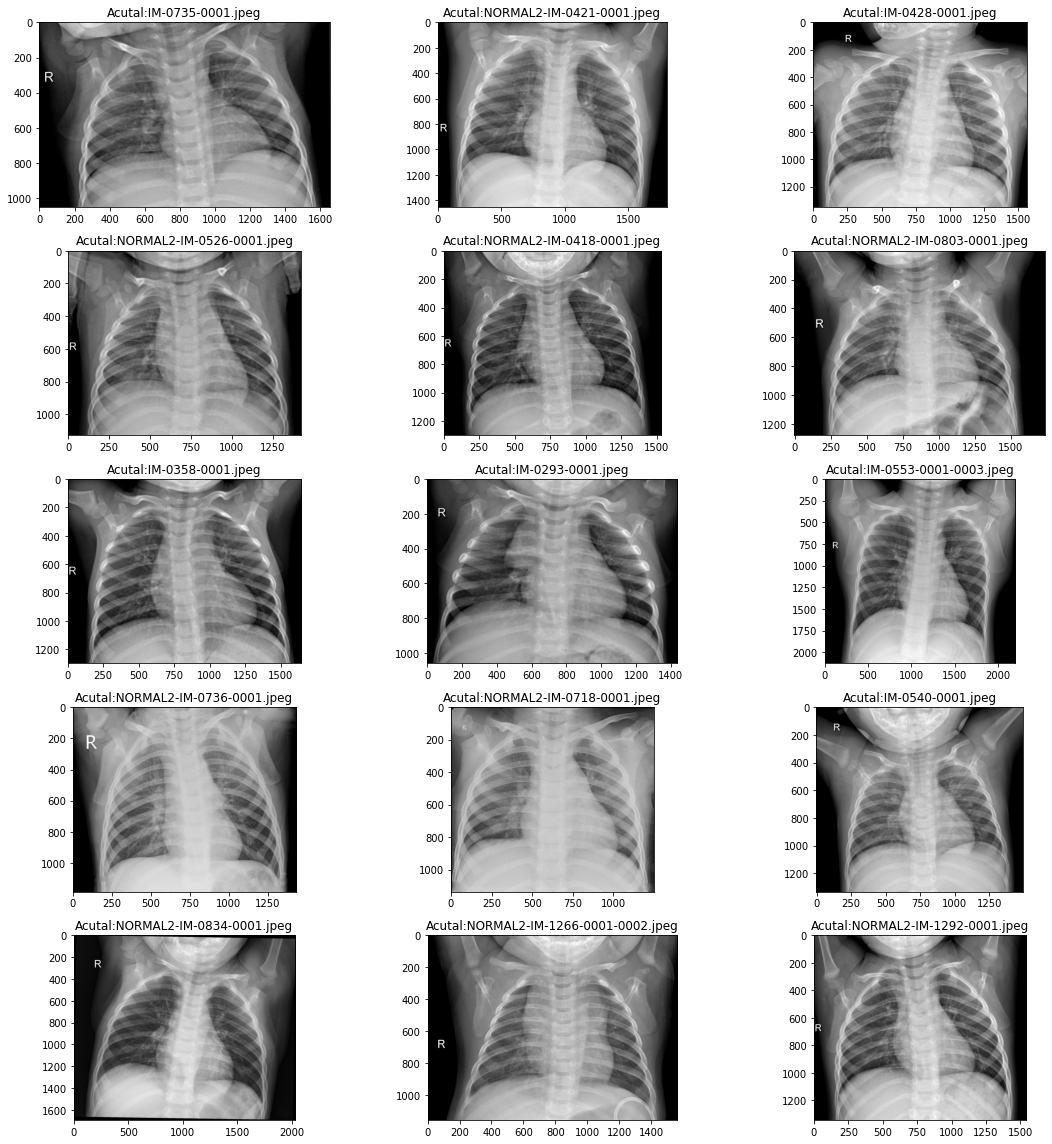

In [61]:
fig,ax = plt.subplots(5,3)
fig.set_size_inches(16,16)

    
for i in range(0,15):
    plt.subplot(5,3,i+1)
    sample = random.choice(Normal)
    img = load_img('C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/NORMAL/'+ sample)
    plt.title("Acutal:" + sample)
    plt.imshow(img)
plt.tight_layout()

In [62]:
# new_Frame = pd.concat([Pneumonia_df,Normal_df])

In [63]:
# new_Frame = new_Frame.reset_index(drop=True)

In [64]:
# new_Frame['category'] = new_Frame['category'].replace({2:'normal'})

In [65]:
from sklearn.model_selection import train_test_split

train_df , validation_df = train_test_split(new_Frame,test_size=0.2,random_state=41)

In [66]:
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

In [67]:
train_df

,filename,category
0,NORMAL2-IM-0948-0001.jpeg,normal
1,person337_bacteria_1558.jpeg,bacteria
2,person281_bacteria_1329.jpeg,bacteria
3,person1351_virus_2330.jpeg,virus
4,person474_virus_971.jpeg,virus
...,...,...
4167,NORMAL2-IM-1357-0001.jpeg,normal
4168,IM-0384-0001.jpeg,normal
4169,IM-0279-0001.jpeg,normal
4170,person1442_bacteria_3726.jpeg,bacteria


In [69]:
train_generator = ImageDataGenerator( 

    shear_range=0.2,
    horizontal_flip=True, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    zoom_range=0.3
)

train_datagenerator = train_generator.flow_from_dataframe( 

    train_df, 
    'C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/PNEUMONIA',
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64,
    shuffle=True
)

Found 3107 validated image filenames belonging to 2 classes.


In [70]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_datagenerator = validation_datagen.flow_from_dataframe( 

        validation_df ,
        'C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/PNEUMONIA',
        x_col= 'filename',
        y_col= 'category',
        target_size=(224,224),
        class_mode='categorical',
        batch_size=64,
        shuffle=True
    
    )

Found 768 validated image filenames belonging to 2 classes.


In [71]:
example_df = train_df.sample(n=1)

example_generator = train_generator.flow_from_dataframe( 
 
    example_df, 
    'C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/PNEUMONIA',
    x_col = 'filename',
    y_col = 'category',
    target_size = (224,244),
    class_mode = 'categorical'
    )

Found 1 validated image filenames belonging to 1 classes.


In [72]:
example_df

,filename,category
4059,person921_virus_1578.jpeg,virus


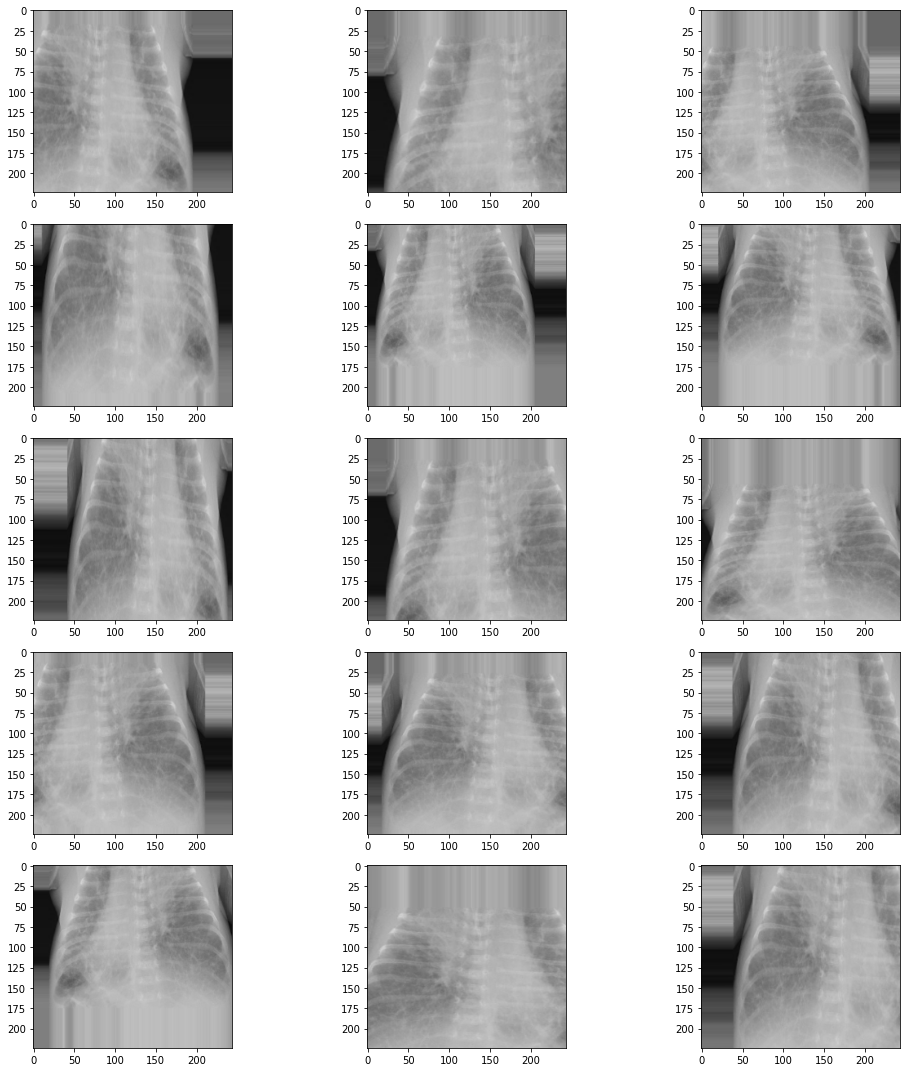

In [73]:
plt.figure(figsize=(15,15))

for i in range(0,15): 
    
    plt.subplot(5,3,i+1)
    for X_batch,Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
        
plt.tight_layout()
plt.show()

In [74]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization ,Flatten
from keras.models import load_model,Sequential 

models = Sequential()

models.add(Conv2D(32,(2,2),activation='relu',input_shape=(224,224,3)))
models.add(BatchNormalization())
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))


models.add(Conv2D(64,(2,2),activation='relu'))
models.add(BatchNormalization())
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))

models.add(Conv2D(128,(2,2),activation='relu'))
models.add(BatchNormalization())
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))

models.add(Conv2D(256,(2,2),activation='relu'))
models.add(BatchNormalization())
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))

models.add(Flatten())
models.add(Dense(512,activation='relu'))
models.add(BatchNormalization())
models.add(Dense(2,activation='softmax'))
models.add(Dropout(0.25))

models.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
models.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 32)      416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 223, 223, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 64)      8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 110, 110, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 64)       

In [75]:
batch_size = 64

In [76]:
total_shape = train_df.shape[0]//batch_size
total_shape

65

In [77]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.3,min_lr=0.01)

In [79]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Physical devices cannot be modified after being initialized


In [80]:
pred = models.fit_generator(
    train_datagenerator,
    steps_per_epoch=total_shape,
    epochs=5,
    verbose=1,
    callbacks=[learning_rate_reduction],
    validation_data=validation_datagenerator,
    validation_steps=total_shape,
    shuffle=True,
)

Epoch 1/5
65/65 [==============================] - 122s 2s/step - loss: 4.3744 - accuracy: 0.5470 - val_loss: 4.0739 - val_accuracy: 0.6649
Epoch 2/5
65/65 [==============================] - 102s 2s/step - loss: 3.5049 - accuracy: 0.5836 - val_loss: 4.5518 - val_accuracy: 0.6651
Epoch 3/5
65/65 [==============================] - 103s 2s/step - loss: 3.4800 - accuracy: 0.5835 - val_loss: 3.0319 - val_accuracy: 0.6656
Epoch 4/5
65/65 [==============================] - 119s 2s/step - loss: 3.6837 - accuracy: 0.6007 - val_loss: 2.6444 - val_accuracy: 0.6668
Epoch 5/5
65/65 [==============================] - 108s 2s/step - loss: 4.7644 - accuracy: 0.5533 - val_loss: 7.8861 - val_accuracy: 0.3450


In [81]:
# from keras.models import load_model 

# # load = load_model('./Pneumonia model.h5')
# load.summary()

In [ ]:
# Pneumonia = models.save('Pneumonia model.h5')

In [82]:
pred.history

{'val_loss': [4.073915481567383,
  4.551779747009277,
  3.031851291656494,
  2.644395351409912,
  7.886063098907471],
 'val_accuracy': [0.6649038195610046,
  0.6651442050933838,
  0.6656249761581421,
  0.6668269038200378,
  0.34495192766189575],
 'loss': [4.360465627581177,
  3.509014424552341,
  3.4855795034165244,
  3.683925551093828,
  4.7666908701405175],
 'accuracy': [0.546962, 0.58361775, 0.58351487, 0.600702, 0.55325586],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001]}

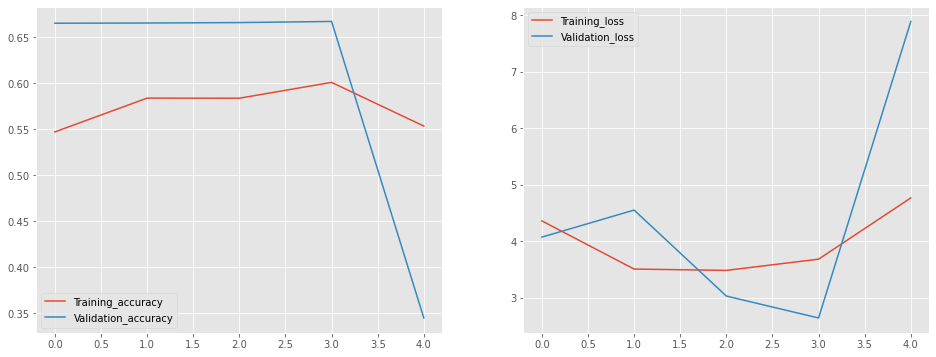

In [97]:
fig ,ax = plt.subplots(1,2)
fig.set_size_inches(16,6)

train_acc = pred.history['accuracy']
validation_acc = pred.history['val_accuracy']
validation_loss = pred.history['val_loss']
train_loss = pred.history['loss']

ax[0].plot(train_acc,label='Training_accuracy')
ax[0].plot(validation_acc,label='Validation_accuracy')
ax[0].legend()
plt.grid(axis='both')

ax[1].plot(train_loss,label='Training_loss')
ax[1].plot(validation_loss,label='Validation_loss')
ax[1].legend()
plt.grid(axis='both')
plt.style.use('ggplot')

In [98]:
test_filenames = os.listdir('C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/val/PNEUMONIA')

test_df = pd.DataFrame({ 
    'filename' : test_filenames

})
nb_samples = test_df.shape[0]



In [99]:

test_gen = ImageDataGenerator(rescale=1/255) 

test_generator = test_gen.flow_from_dataframe( 

    test_df, 
    'C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/val/PNEUMONIA',
        
    x_col = 'filename',
    y_col = None, 
    class_mode = None, 
    target_size= (224,224), 
    batch_size = 64 , 
    shuffle = False
    
)

Found 18 validated image filenames.


In [100]:
predict = models.predict_generator(test_generator,steps=np.ceil(nb_samples/batch_size))

In [101]:
test_df['category'] = np.argmax(predict,axis=-1)

label_map = dict((v,k) for k,v in train_datagenerator.class_indices.items()) 
test_df['category'] = test_df['category'].replace(label_map)

<AxesSubplot:>

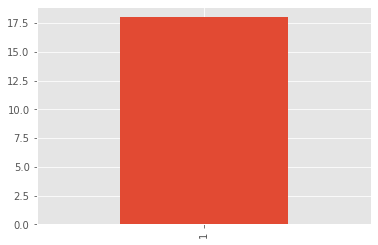

In [102]:
test_df['category'] = test_df['category'].replace({ 'virus':1, 'bacteria':0 })

test_df['category'].value_counts().plot.bar()

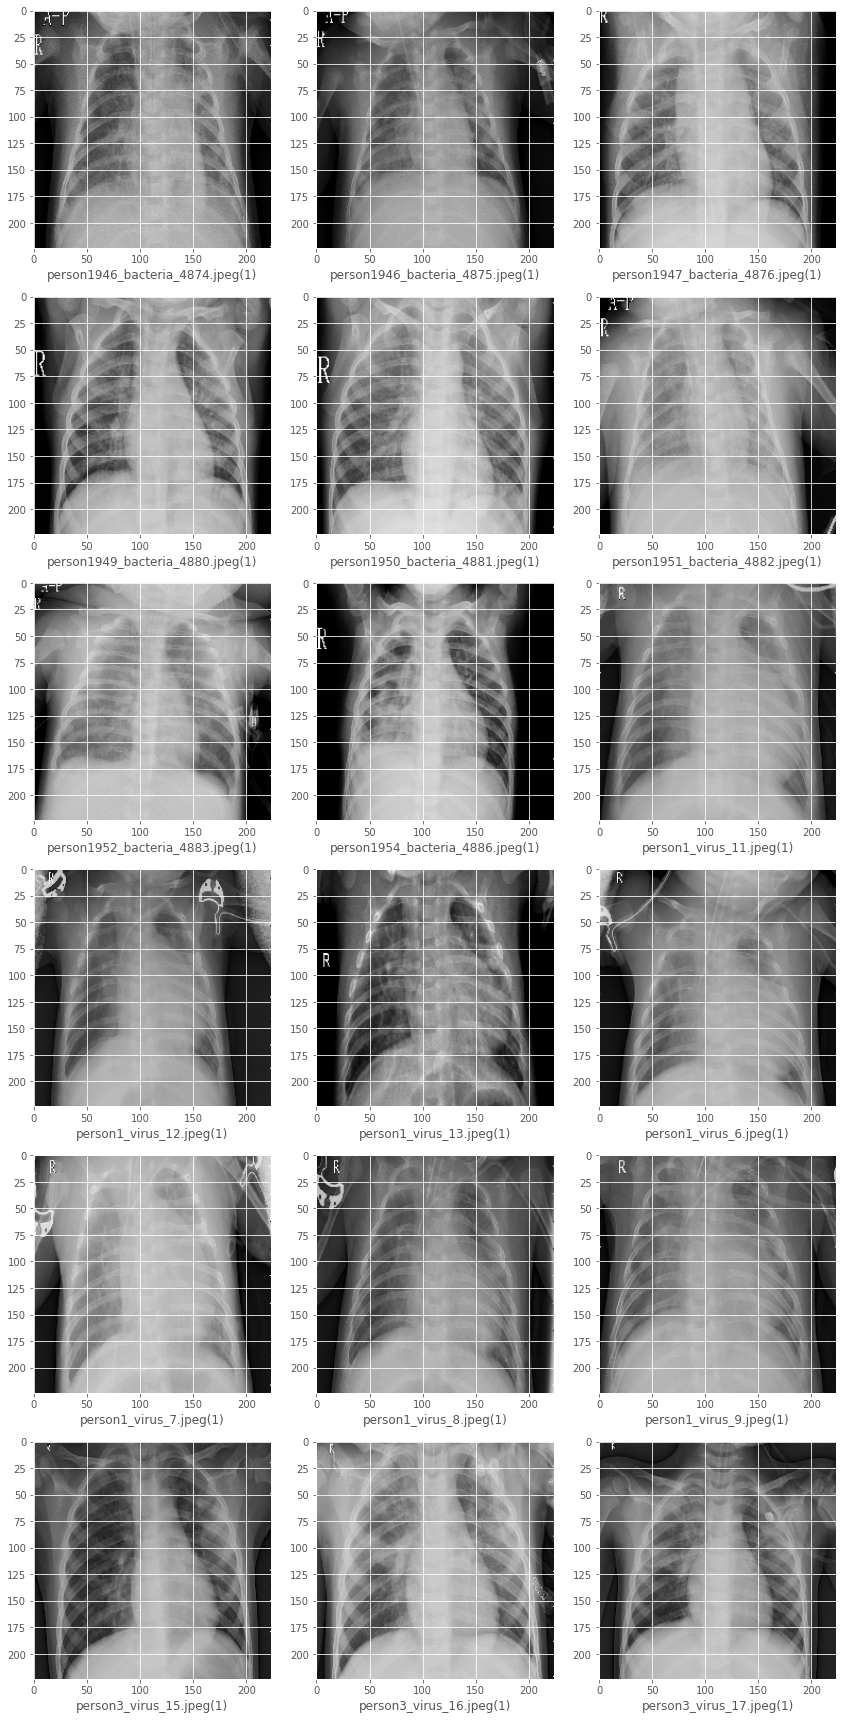

In [104]:

sample_test = test_df.head(18)
sample_test.head()


plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img('C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/val/PNEUMONIA/'+filename, target_size=(224,224))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()


In [ ]:

submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)